# Project Design

Planing Project<ol>
    <li>**Module**<ol>
        <li>Libraries needed
        <li>Import</ol>
    <li>Data Preparation
    <li>Data Exploration
    <li>Data Modeling
    <li>Presentation and automation</ol>

# Libraries needed

**From**

`sklearn`

`keras`

**Import**

`pandas as pd`

`seaborn as sns`

`datetime`

`numpy as np`

`featurewiz as FW`

`preprocessing`

`LabelEncoder`

`StandardScaler`

`train_test_split`

`Dense, BatchNormalization, Dropout, LSTM`

`Sequential`

`to_categorical`

`Adam`

`regularizers`

`Precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score`

`callbacks`

`pythainlp`

# IMPORT

`Import Liraries`

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
import featurewiz as FW
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed (0)

In [15]:
# A=[1,5,4]
# B=[2,6,7]
# C=[3,8,9]
# pd.DataFrame(np.array([A,B,C]), columns = ["A","B","C"])

# DATASET Hatyai city In Thailand

In [16]:
hy=pd.read_csv("C:/Users/TUF GAMING/Documents/GitHub/data-science-with-python-2022/Rain_Prediction/Rainfall_Hatyai.csv")
hy.head()

,Date,MO,YEAR,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,1,2021,Hatyai,24.34,27.35,0.6,NaN,NaN,W,...,17.52,85.50,100.51,100.40,8.0,NaN,25.56,27.40,No,No
1,2,1,2021,Hatyai,24.22,26.87,0.0,NaN,NaN,WNW,...,17.33,86.19,100.57,100.48,NaN,NaN,26.33,28.03,No,No
2,3,1,2021,Hatyai,24.43,27.33,0.0,NaN,NaN,WSW,...,18.13,88.62,100.60,100.50,NaN,2.0,26.88,28.46,No,No
3,4,1,2021,Hatyai,24.49,27.44,0.0,NaN,NaN,NE,...,18.55,90.69,100.59,100.47,NaN,NaN,27.30,28.65,No,No
4,5,1,2021,Hatyai,24.55,28.02,1.0,NaN,NaN,W,...,19.04,90.88,100.54,100.40,7.0,8.0,27.35,28.64,No,No


In [17]:
hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    int64  
 1   MO             365 non-null    int64  
 2   YEAR           365 non-null    int64  
 3   Location       365 non-null    object 
 4   MinTemp        365 non-null    float64
 5   MaxTemp        365 non-null    float64
 6   Rainfall       363 non-null    float64
 7   Evaporation    0 non-null      float64
 8   Sunshine       0 non-null      float64
 9   WindGustDir    361 non-null    object 
 10  WindGustSpeed  361 non-null    float64
 11  WindDir9am     300 non-null    object 
 12  WindDir3pm     354 non-null    object 
 13  WindSpeed9am   365 non-null    float64
 14  WindSpeed3pm   365 non-null    float64
 15  Humidity9am    365 non-null    float64
 16  Humidity3pm    365 non-null    float64
 17  Pressure9am    365 non-null    float64
 18  Pressure3p

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

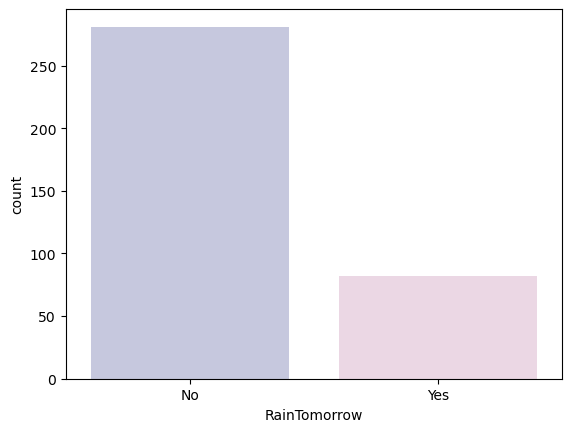

In [18]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= hy["RainTomorrow"], palette= cols)

<AxesSubplot:>

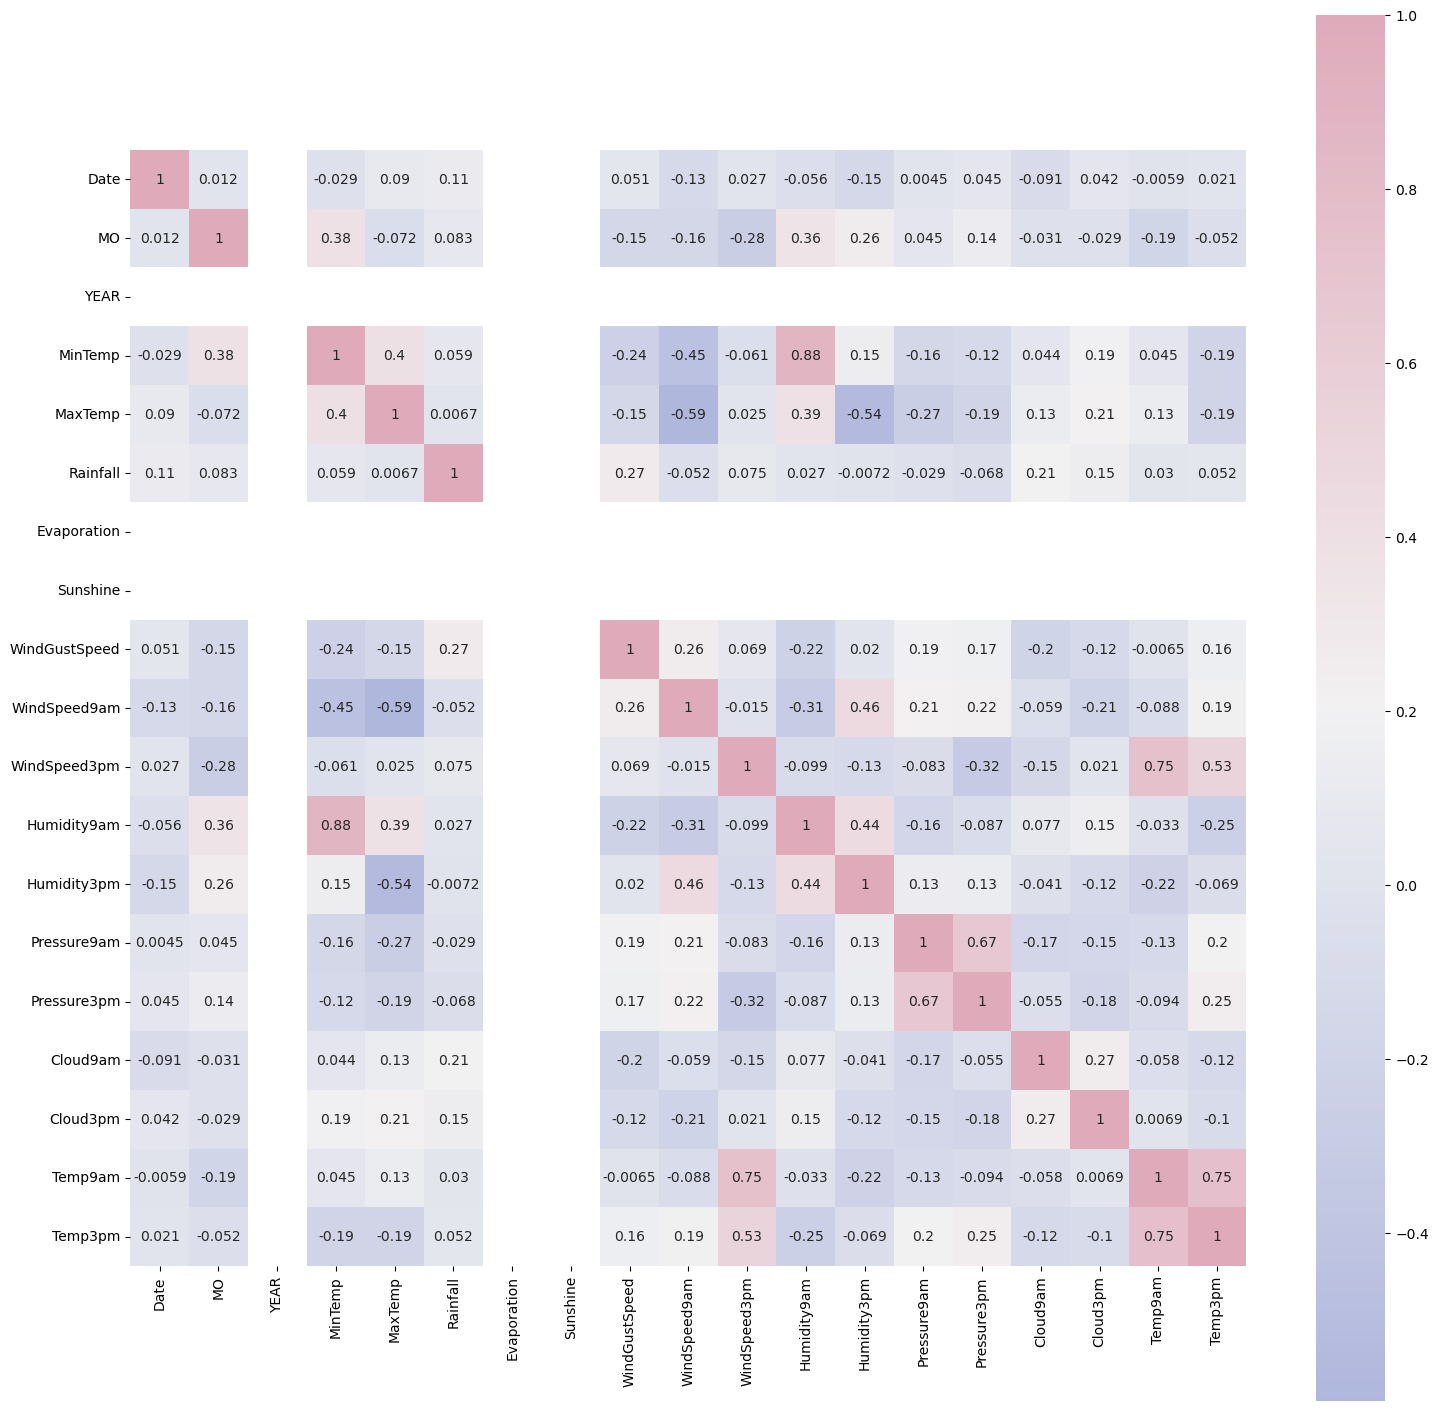

In [20]:
corrmat = hy.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6,as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap= cmap,annot=True, square=True)

In [24]:
lengths = hy["Date"].str.len()
lengths.value_counts()

AttributeError: Can only use .str accessor with string values!

In [25]:
hy['Date']=pd.to_datetime(hy["Date"])
# Creating a collumn of year
hy['Year']=hy.Date.dt.year

# function to encode datetime into cyclic parameters.
# As I am planning to use this data in a nueral network I prefer the months and days in a cyclic continuos feature.

def encode(hy,col, max_val):
    hy[col + '_sin'] = np.sin(2 * np.pi * hy[col]/max_val)
    hy[col + '_cos'] = np.cos(2 * np.pi * hy[col]/max_val)
    return hy

hy['month'] = hy.Date.dt.month
hy = encode(hy, 'month', 12)

hy['day'] = hy.Date.dt.day
hy = encode(hy, 'day', 31)

hy.head()

,Date,MO,YEAR,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Temp3pm,RainToday,RainTomorrow,Year,month,month_sin,month_cos,day,day_sin,day_cos
0,1970-01-01 00:00:00.000000001,1,2021,Hatyai,24.34,27.35,0.6,NaN,NaN,W,...,27.40,No,No,1970,1,0.5,0.866025,1,0.201299,0.97953
1,1970-01-01 00:00:00.000000002,1,2021,Hatyai,24.22,26.87,0.0,NaN,NaN,WNW,...,28.03,No,No,1970,1,0.5,0.866025,1,0.201299,0.97953
2,1970-01-01 00:00:00.000000003,1,2021,Hatyai,24.43,27.33,0.0,NaN,NaN,WSW,...,28.46,No,No,1970,1,0.5,0.866025,1,0.201299,0.97953
3,1970-01-01 00:00:00.000000004,1,2021,Hatyai,24.49,27.44,0.0,NaN,NaN,NE,...,28.65,No,No,1970,1,0.5,0.866025,1,0.201299,0.97953
4,1970-01-01 00:00:00.000000005,1,2021,Hatyai,24.55,28.02,1.0,NaN,NaN,W,...,28.64,No,No,1970,1,0.5,0.866025,1,0.201299,0.97953


Text(0.5, 0, 'Days In Year')

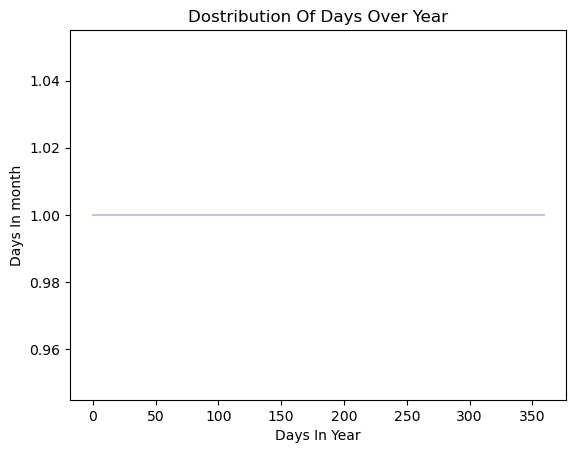

In [26]:
section = hy[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Dostribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

In [31]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",hy=hy, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encording of Month")
cyclic_month.set_ylabel("Cosine Encode Months")
cyclic_month.set_xlabel("Sine Encoded Months")

ValueError: Could not interpret value `month_sin` for parameter `x`

In [32]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',hy=hy, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encording of Day")
cyclic_day.set_ylabel("Cosine Encode Day")
cyclic_day.set_xlabel("Sine Encoded Day")

ValueError: Could not interpret value `day_sin` for parameter `x`

In [33]:
s = (hy.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [35]:
for i in object_cols:
    print(i, hy[i].isnull().sum())

Location 0
WindGustDir 4
WindDir9am 65
WindDir3pm 11
RainToday 2
RainTomorrow 2


In [36]:
for i in object_cols:
    hy[i].fillna(hy[i].mode()[0], inplace=True)

In [37]:
t = (hy.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [38]:
for i in num_cols:
    print(i, hy[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 2
Evaporation 365
Sunshine 365
WindGustSpeed 4
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 237
Cloud3pm 231
Temp9am 0
Temp3pm 0
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [39]:
for i in num_cols:
    hy[i].fillna(hy[i].median(), inplace=True)

hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   MO             365 non-null    int64         
 2   YEAR           365 non-null    int64         
 3   Location       365 non-null    object        
 4   MinTemp        365 non-null    float64       
 5   MaxTemp        365 non-null    float64       
 6   Rainfall       365 non-null    float64       
 7   Evaporation    0 non-null      float64       
 8   Sunshine       0 non-null      float64       
 9   WindGustDir    365 non-null    object        
 10  WindGustSpeed  365 non-null    float64       
 11  WindDir9am     365 non-null    object        
 12  WindDir3pm     365 non-null    object        
 13  WindSpeed9am   365 non-null    float64       
 14  WindSpeed3pm   365 non-null    float64       
 15  Humidity9am    365 non-

In [40]:
label_encoder = LabelEncoder()
for i in object_cols:
    hy[i] = label_encoder.fit_transform(hy[i])

hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   MO             365 non-null    int64         
 2   YEAR           365 non-null    int64         
 3   Location       365 non-null    int32         
 4   MinTemp        365 non-null    float64       
 5   MaxTemp        365 non-null    float64       
 6   Rainfall       365 non-null    float64       
 7   Evaporation    0 non-null      float64       
 8   Sunshine       0 non-null      float64       
 9   WindGustDir    365 non-null    int32         
 10  WindGustSpeed  365 non-null    float64       
 11  WindDir9am     365 non-null    int32         
 12  WindDir3pm     365 non-null    int32         
 13  WindSpeed9am   365 non-null    float64       
 14  WindSpeed3pm   365 non-null    float64       
 15  Humidity9am    365 non-

In [41]:
features = hy.drop(['RainTomorrow', 'Date', 'day', 'month'], axis=1) # dropping target and extra columns

target = hy['RainTomorrow']

#   Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
MO,365.0,3.418879e-16,1.001373,-1.602745e+00,-7.326381e-01,1.374690e-01,1.007576e+00,1.587648e+00
YEAR,365.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Location,365.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MinTemp,365.0,3.332114e-15,1.001373,-3.561463e+00,-5.113707e-01,2.367651e-01,6.491990e-01,2.298934e+00
MaxTemp,365.0,-2.054977e-15,1.001373,-2.620957e+00,-7.875092e-01,7.904581e-02,6.901952e-01,2.660468e+00
Rainfall,365.0,1.764190e-17,1.001373,-3.903209e-01,-3.903209e-01,-3.903209e-01,-2.243398e-01,7.576773e+00
Evaporation,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustDir,365.0,-8.161280e-17,1.001373,-2.039105e+00,-9.348420e-01,1.694212e-01,8.319791e-01,1.273684e+00
WindGustSpeed,365.0,1.721606e-16,1.001373,-1.588763e+00,-7.209514e-01,-1.201586e-01,5.473890e-01,4.218901e+00


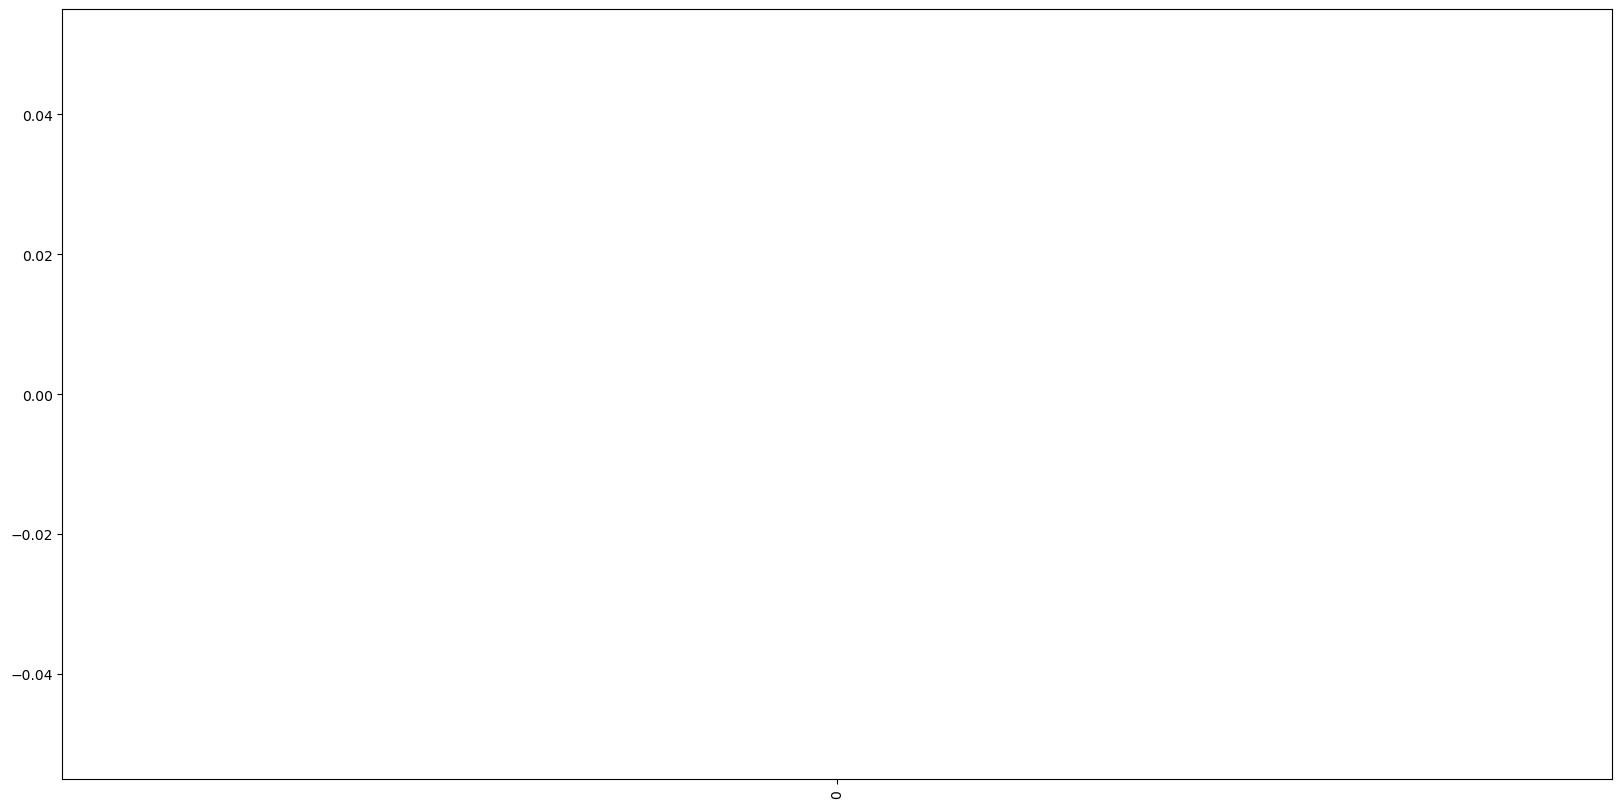

In [42]:
colours = ["#D0DBEE", "#C2C4E2","#EED4E5","#D1E6DC","#BDE2E2"]
plt.figure(figsize=(20, 10))
sns.boxenplot(hy = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [44]:
features["RainTomorrow"]=target

#   Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]<2.2)]
features = features[(features["Pressure9am"]<2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]<2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

features.shape

(0, 29)

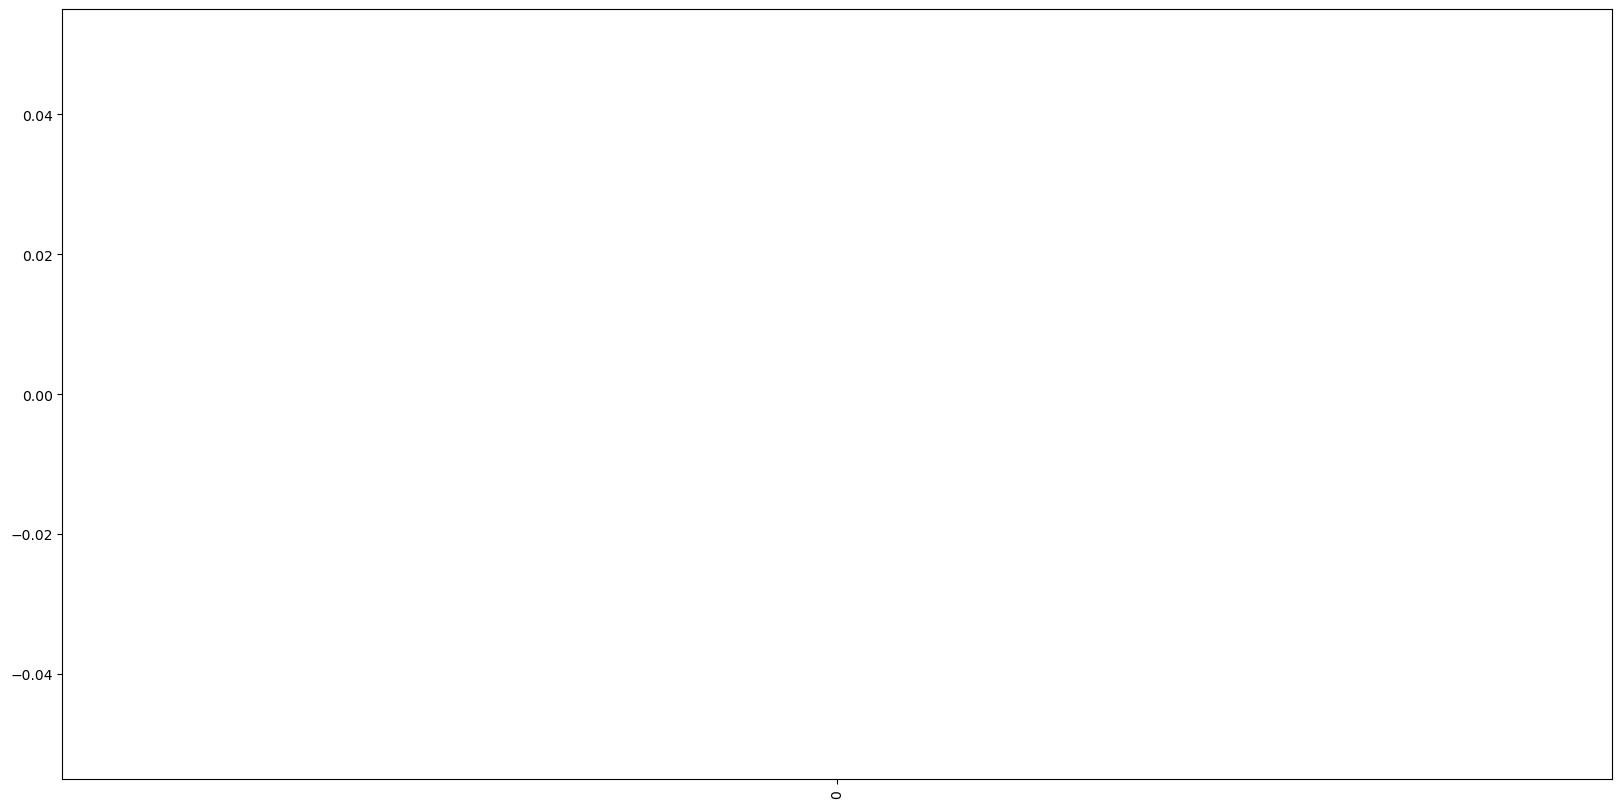

In [46]:
plt.figure(figsize=(20,10))
sns.boxenplot(hy = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [47]:
x = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

#   Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x.shape

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
#   Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, #  Minimum amount of change to count as an improvement
    patience=20, #  How many epochs to wait before stopping
    restore_best_weights=True,
)

#  Initialising the NN
model = Sequential()

#  Layers

model.add(Dense(units=32,kernel_initializer="uniform", activation='relu', input_dim = 26))
model.add(Dense(units=32,kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer='uniform',activation='sigmoid'))

#  Compling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

#  Train the ANN
history = model.fit(X_train, y_train, batch_size = 32,epochs = 150, callbacks=[early_stopping],
validation_split=0.2)

NameError: name 'X_train' is not defined

In [49]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

NameError: name 'history' is not defined

In [50]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:,['accuracy']],"#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:,['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [51]:
#  Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

NameError: name 'X_test' is not defined

NameError: name 'y_test' is not defined

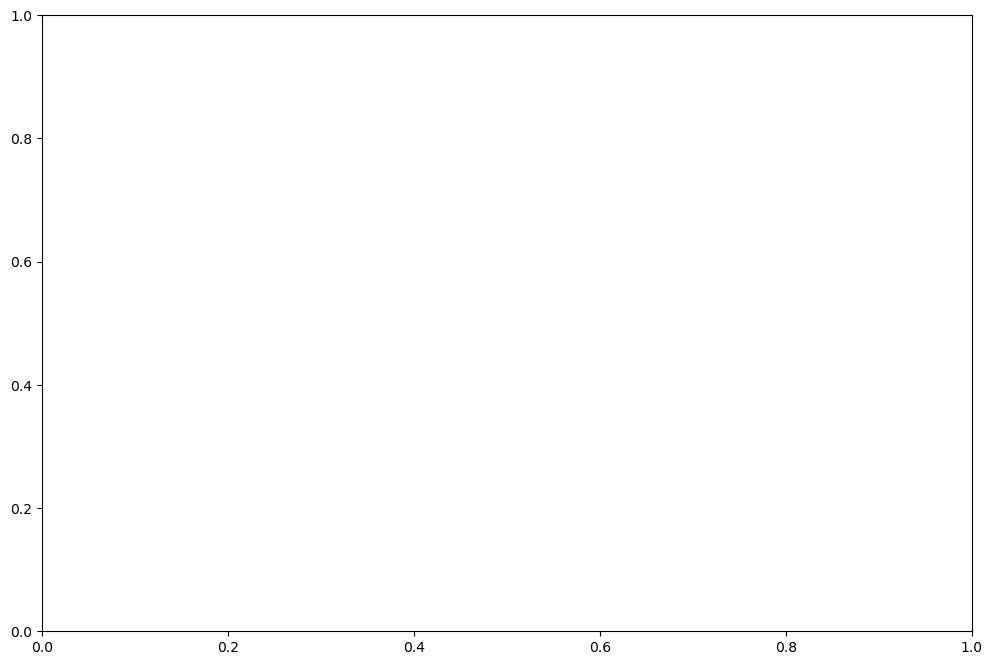

In [52]:
#  Confusion matrix
cmap1 = sns.diverging_palette(260, -10,s=50, l=75, n=5,as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap=cmap1,annot=True, annot_kws={'size':15})

In [53]:
print(classification_report(y_test,y_pred))

NameError: name 'y_test' is not defined

# END